In [1]:
import os
from keras import layers , models , optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import VGG16


In [2]:
#Fetching datasets for cats_train, cats_test, dogs_train, dogs_test , cats_valid , dogs_valid
cats_train = 'dogs-vs-cat-small/train/cats'
cats_test = 'dogs-vs-cat-small/test/cats'
cats_valid = 'dogs-vs-cat-small/validation/cats'

dogs_train = 'dogs-vs-cat-small/train/dogs'
dogs_test = 'dogs-vs-cat-small/test/dogs'
dogs_valid = 'dogs-vs-cat-small/validation/dogs'


print("Cats Training Images",len(os.listdir(cats_train)))
print("Cats Testing Images",len(os.listdir(cats_test)))
print("Cats Validation Images",len(os.listdir(cats_valid)))

print("Dogs Training Images",len(os.listdir(dogs_train)))
print("Dogs Testing Images",len(os.listdir(dogs_test)))
print("Dogs Validation Images",len(os.listdir(dogs_valid)))

train_dir = 'dogs-vs-cat-small/train/'
test_dir = 'dogs-vs-cat-small/test/'
validation_dir ='dogs-vs-cat-small/validation/'


Cats Training Images 1000
Cats Testing Images 500
Cats Validation Images 500
Dogs Training Images 1000
Dogs Testing Images 500
Dogs Validation Images 500


In [3]:
#Normalizing color ranges to 0-1
rescale_train = ImageDataGenerator(rescale=1./255)
rescale_test = ImageDataGenerator(rescale=1./255)


train_get = rescale_train.flow_from_directory('dogs-vs-cat-small/train',target_size=(150, 150),batch_size=20,class_mode='binary')
valid_get = rescale_test.flow_from_directory('dogs-vs-cat-small/validation',target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
#initializating as a sequencial model
CNN = models.Sequential()
#Base Layer
CNN.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
CNN.add(layers.MaxPooling2D((2, 2)))

#further 3 layers of 64,128,128. No need to add input shape as it is already defined in base layer.
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))

CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))

CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))

CNN.add(layers.Flatten()) # 1-D vector space

CNN.add(layers.Dense(512, activation='relu')) # 512 neurons

CNN.add(layers.Dense(1, activation='sigmoid')) # 0 or 1 output, So one neuron required at the end only.

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
#Adding loss function
CNN.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(),metrics=['acc'])


In [6]:
#Model training with 30 epochs and 100 steps per epoch
import scipy

history = CNN.fit_generator(train_get,steps_per_epoch=100,epochs=30,validation_data=valid_get,validation_steps=50)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 77s 771ms/step - loss: 0.7288 - acc: 0.5295 - val_loss: 0.6840 - val_acc: 0.5930
Epoch 2/30
100/100 [==============================] - 63s 635ms/step - loss: 0.6746 - acc: 0.6000 - val_loss: 0.7055 - val_acc: 0.6150
Epoch 3/30
100/100 [==============================] - 62s 618ms/step - loss: 0.6264 - acc: 0.6540 - val_loss: 0.6163 - val_acc: 0.6430
Epoch 4/30
100/100 [==============================] - 62s 616ms/step - loss: 0.5847 - acc: 0.7025 - val_loss: 0.6047 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 62s 624ms/step - loss: 0.5465 - acc: 0.7490 - val_loss: 0.5808 - val_acc: 0.7070
Epoch 6/30
100/100 [==============================] - 64s 638ms/step - loss: 0.4937 - acc: 0.7540 - val_loss: 0.5780 - val_acc: 0.7150
Epoch 7/30
100/100 [==============================] - 62s 617ms/step - loss: 0.4435 - acc: 0.7910 - val_loss: 0.93

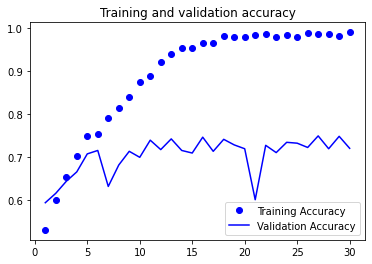

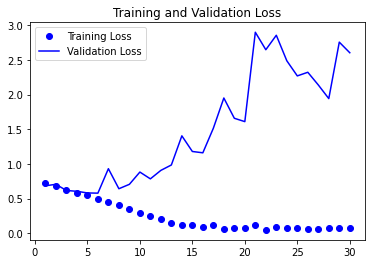

In [10]:
import h5py
CNN.save('weights1.h5')

#Plotting losses and accuracy calcuated during training.

accuracy = history.history['acc']
accuracy_val = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [30]:
test_loss, test_acc = CNN.evaluate(rescale_train.flow_from_directory('dogs-vs-cat-small/test',target_size=(150, 150),batch_size=20,class_mode='binary'))

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 7s 143ms/step - loss: 1.5453 - acc: 0.7710


In [4]:

#initializating as a sequencial model
CNN = models.Sequential()
#Base Layer
CNN.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
CNN.add(layers.MaxPooling2D((2, 2)))

#further 3 layers of 64,128,128. No need to add input shape as it is already defined in base layer.
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))

CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))

CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))

CNN.add(layers.Flatten()) # 1-D vector space

CNN.add(layers.Dropout(0.5))#Newly Defined dropout layer

CNN.add(layers.Dense(512, activation='relu')) # 512 neurons

CNN.add(layers.Dense(1, activation='sigmoid')) # 0 or 1 output, So one neuron required at the end only.

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
#Adding loss function
CNN.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(),metrics=['acc'])


In [6]:
#Model training with 30 epochs and 100 steps per epoch
import scipy

history = CNN.fit_generator(train_get,steps_per_epoch=100,epochs=30,validation_data=valid_get,validation_steps=100)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 60s 596ms/step - loss: 0.7402 - acc: 0.5110 - val_loss: 0.7672 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 52s 524ms/step - loss: 0.6849 - acc: 0.5740
Epoch 3/30
100/100 [==============================] - 52s 523ms/step - loss: 0.6391 - acc: 0.6545
Epoch 4/30
100/100 [==============================] - 53s 526ms/step - loss: 0.5850 - acc: 0.7005
Epoch 5/30
100/100 [==============================] - 51s 512ms/step - loss: 0.5512 - acc: 0.7240
Epoch 6/30
100/100 [==============================] - 52s 524ms/step - loss: 0.5560 - acc: 0.7490
Epoch 7/30
100/100 [==============================] - 51s 506ms/step - loss: 0.4861 - acc: 0.7635
Epoch 8/30
100/100 [==============================] - 52s 518ms/step - loss: 0.4700 - acc: 0.7850
Epoch 9/30
100/100 [==============================] - 50s 505ms/step - loss: 0.4474 - acc: 0.7930
Epoch

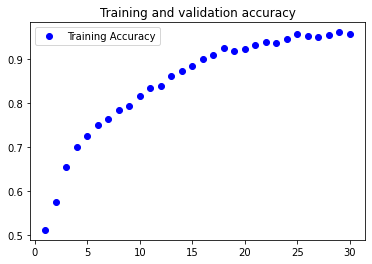

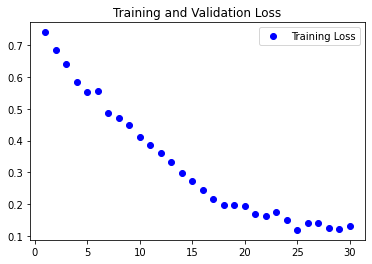

In [10]:
#Plotting losses and accuracy calcuated during training.

accuracy = history.history['acc']
accuracy_val = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
test_loss, test_acc = CNN.evaluate(rescale_train.flow_from_directory('dogs-vs-cat-small/test',target_size=(150, 150),batch_size=20,class_mode='binary'))

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 8s 156ms/step - loss: 1.1216 - acc: 0.7590


In [45]:
import h5py
CNN.save('weights_dropout.h5')